In [0]:
import numpy as np
from numpy.linalg import matrix_power
import functools

## Условие

In [2]:
# Хохлосюк
# A = np.array([[3,-2,2],[0.1,1.8,-1.7],[-0.9,1.8,-1.7]])
# m = 3.0

# Сережа
A = np.array([[-3, 4, -4],[-3, 5, -5],[-1, 2, -2]])
m = 12.0

# Ира
# A = np.array([[-2, 3.5, -3.5],[-3.5, 6.75, -7],[-1.75, 3.5, -3.75]])
# m = 7.0

print('m =', m)
print(A)

m = 12.0
[[-3  4 -4]
 [-3  5 -5]
 [-1  2 -2]]


## Пункт 1-2

In [3]:
ev = np.linalg.eig(A)
print('Собственные значения:\n', ev[0])
print('Собственные векторы:\n', ev[1])

Собственные значения:
 [ 1.00000000e+00 -1.00000000e+00 -6.06741369e-15]
Собственные векторы:
 [[-4.08248290e-01 -8.94427191e-01 -7.21754760e-15]
 [-8.16496581e-01 -4.47213595e-01  7.07106781e-01]
 [-4.08248290e-01 -6.06741369e-16  7.07106781e-01]]


## Пункт 3

In [4]:
if (abs(np.max(ev[0]) - 1) < 0.0001):
    print('Система на границе устойчивости')
elif (np.max(ev[0]) < 1):
    print('Устойчивая система')
elif (np.max(ev[0]) > 1):
    print('Неустойчивая система')

Система на границе устойчивости


## Пункт 4

In [5]:
epsilon = 0.0001
k = 1 / (np.max(ev[0]) + epsilon)
A_hat = A * k
print('Скорректированная матрица:')
print(A_hat)

Скорректированная матрица:
[[-2.99970003  3.99960004 -3.99960004]
 [-2.99970003  4.99950005 -4.99950005]
 [-0.99990001  1.99980002 -1.99980002]]


In [6]:
ev_hat = np.linalg.eig(A_hat)
print('Собственные значения скорректированной матрицы:\n', ev_hat[0])
print('Собственные векторы скорректированной матрицы:\n', ev_hat[1])

Собственные значения скорректированной матрицы:
 [ 9.99900010e-01 -9.99900010e-01  1.32724675e-15]
Собственные векторы скорректированной матрицы:
 [[-4.08248290e-01 -8.94427191e-01  1.60506509e-15]
 [-8.16496581e-01 -4.47213595e-01  7.07106781e-01]
 [-4.08248290e-01  0.00000000e+00  7.07106781e-01]]


## Пункт 5

#### Выбираем соответствующие собственные вектора:

In [7]:
def desc_eig(v):
    if (abs(v) < 1):
        return 'с асимптотически убывающими состояниями, т.к. соответствующее собственное значение по модулю меньше 1'
    if (abs(abs(v) - 1) < 0.0001):
        return 'с равномерно ограниченными состояниями, т.к. соответствующее собственное значение по модулю равно 1'
    return 'с асимптотически возрастающими состояниями, т.к. соответствующее собственное значение по модулю больше 1'

for i in range(3):
    print('При Xo =', ev[1][i], 'система', desc_eig(ev[0][i]), '\n')

При Xo = [-4.08248290e-01 -8.94427191e-01 -7.21754760e-15] система с равномерно ограниченными состояниями, т.к. соответствующее собственное значение по модулю равно 1 

При Xo = [-0.81649658 -0.4472136   0.70710678] система с равномерно ограниченными состояниями, т.к. соответствующее собственное значение по модулю равно 1 

При Xo = [-4.08248290e-01 -6.06741369e-16  7.07106781e-01] система с асимптотически убывающими состояниями, т.к. соответствующее собственное значение по модулю меньше 1 



## Пункт 6

In [8]:
np.linalg.matrix_power(A, 1)

array([[-3,  4, -4],
       [-3,  5, -5],
       [-1,  2, -2]])

In [9]:
np.linalg.matrix_power(A, 2)

array([[ 1,  0,  0],
       [-1,  3, -3],
       [-1,  2, -2]])

In [10]:
np.linalg.matrix_power(A, 3)

array([[-3,  4, -4],
       [-3,  5, -5],
       [-1,  2, -2]])

In [11]:
np.linalg.matrix_power(A, 200)

array([[ 1,  0,  0],
       [-1,  3, -3],
       [-1,  2, -2]])

In [12]:
np.linalg.matrix_power(A_hat, 1)

array([[-2.99970003,  3.99960004, -3.99960004],
       [-2.99970003,  4.99950005, -4.99950005],
       [-0.99990001,  1.99980002, -1.99980002]])

In [13]:
np.linalg.matrix_power(A_hat, 2)

array([[ 9.99800030e-01,  1.89152878e-15, -1.89152878e-15],
       [-9.99800030e-01,  2.99940009e+00, -2.99940009e+00],
       [-9.99800030e-01,  1.99960006e+00, -1.99960006e+00]])

In [14]:
np.linalg.matrix_power(A_hat, 3)

array([[-2.99910018,  3.99880024, -3.99880024],
       [-2.99910018,  4.9985003 , -4.9985003 ],
       [-0.99970006,  1.99940012, -1.99940012]])

In [15]:
np.linalg.matrix_power(A_hat, 200)

array([[ 9.80199653e-01,  1.85444669e-13, -1.85444669e-13],
       [-9.80199653e-01,  2.94059896e+00, -2.94059896e+00],
       [-9.80199653e-01,  1.96039931e+00, -1.96039931e+00]])

#### Скорректированная матрица стремится к 0

## Пункт 7

1) Дискретная

In [16]:
A = np.array(A)
X = [ev[1][1]]
n = 20

print('n =', n)
print('X0 =', X[0])

n = 20
X0 = [-0.81649658 -0.4472136   0.70710678]


In [17]:
f = []
f.append(np.array([1,1,1]))
for i in range(1, 21):
  f.append(m / (i**2) * f[i - 1])
  print('f(%d) = ' % i, str(f[i]))

f(1) =  [12. 12. 12.]
f(2) =  [36. 36. 36.]
f(3) =  [48. 48. 48.]
f(4) =  [36. 36. 36.]
f(5) =  [17.28 17.28 17.28]
f(6) =  [5.76 5.76 5.76]
f(7) =  [1.41061224 1.41061224 1.41061224]
f(8) =  [0.2644898 0.2644898 0.2644898]
f(9) =  [0.03918367 0.03918367 0.03918367]
f(10) =  [0.00470204 0.00470204 0.00470204]
f(11) =  [0.00046632 0.00046632 0.00046632]
f(12) =  [3.88598415e-05 3.88598415e-05 3.88598415e-05]
f(13) =  [2.75927868e-06 2.75927868e-06 2.75927868e-06]
f(14) =  [1.6893543e-07 1.6893543e-07 1.6893543e-07]
f(15) =  [9.00988958e-09 9.00988958e-09 9.00988958e-09]
f(16) =  [4.22338574e-10 4.22338574e-10 4.22338574e-10]
f(17) =  [1.75365498e-11 1.75365498e-11 1.75365498e-11]
f(18) =  [6.49501844e-13 6.49501844e-13 6.49501844e-13]
f(19) =  [2.1590089e-14 2.1590089e-14 2.1590089e-14]
f(20) =  [6.4770267e-16 6.4770267e-16 6.4770267e-16]


In [18]:
Xn = matrix_power(A, n).dot(X[0]) + sum([matrix_power(A, n-k-1).dot(f[k]) for k in range(n)])
print('X(%d) = ' % 20, str(Xn))

X(20) =  [-159.17392417 -318.46442215 -159.25164004]


In [19]:
print('X(%d) = ' % 0, str(X[0]))
for i in range(1, 21):
  X.append(A.dot(X[i-1]) + f[i-1])
  print('X(%d) = ' % i, str(X[i]))

X(0) =  [-0.81649658 -0.4472136   0.70710678]
X(1) =  [-1.16779176 -2.32211214 -0.49214417]
X(2) =  [8.18350342 6.35353545 9.50785583]
X(3) =  [-1.16779176 -4.32211214 21.50785583]
X(4) =  [-51.81649658 -77.64646455  -2.49214417]
X(5) =  [-109.16779176 -184.32211214  -62.49214417]
X(6) =  [-142.53649658 -264.36646455 -117.21214417]
X(7) =  [-155.24779176 -302.40211214 -146.01214417]
X(8) =  [-158.40588434 -314.7958523  -156.12153193]
X(9) =  [-159.2151387  -317.88945908 -158.67826662]
X(10) =  [-159.16017005 -318.37136251 -159.16806254]
X(11) =  [-159.32798768 -318.53128765 -159.24172785]
X(12) =  [-159.17380985 -318.46336966 -159.25066561]
X(13) =  [-159.32934778 -318.54205183 -159.25155939]
X(14) =  [-159.17392367 -318.46441612 -159.25163435]
X(15) =  [-159.32935589 -318.54213766 -159.2516397 ]
X(16) =  [-159.17392417 -318.46442213 -159.25164002]
X(17) =  [-159.32935591 -318.54213802 -159.25164004]
X(18) =  [-159.17392417 -318.46442215 -159.25164004]
X(19) =  [-159.32935591 -318.5421

2) Непрерывная

In [0]:
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from scipy.linalg import expm
from numpy import sqrt, sin, cos, pi
from numpy import vectorize

def integrand(x, A, t, m):
  return expm(A * (t - x)).dot(np.array([(m + 10)/m, 1/m, 2/m])) * sin(x * (m+1) / m + pi * 0.25)

t = 1

In [21]:
def compute(A, t, m, nbins=10000):
    f = lambda x: integrand(x, A, t, m)
    xv = np.linspace(0, t, nbins)
    result = np.apply_along_axis(f, 0, xv.reshape(1,-1))
    return np.trapz(result,xv)
 
I = compute(A, 1, m)

print('Значение интеграла:')
print(I)

Значение интеграла:
[-0.81263701 -3.05138754 -1.09627685]


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Графики вектора подинтегрального выражения:


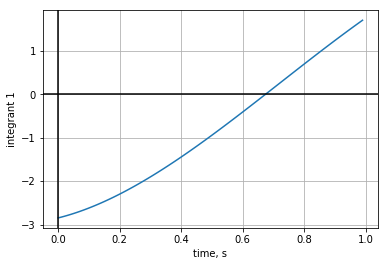

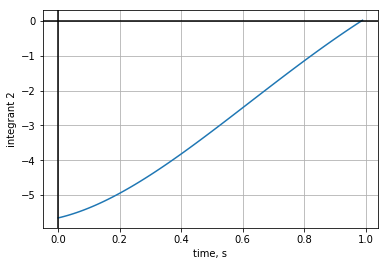

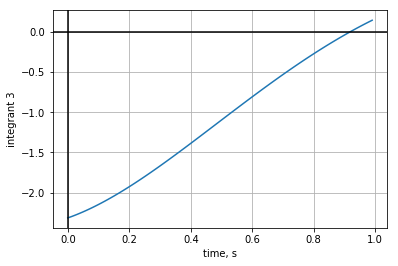

In [23]:
t_arr = np.arange(0., 1., 0.01)

print('Графики вектора подинтегрального выражения:')

for j in range(3):
  plt.plot(t_arr, [integrand(i, A, t, m)[j] for i in t_arr])
  plt.grid(True, which='both')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.xlabel('time, s')
  plt.ylabel('integrant %d' % (j + 1))
  plt.show()

In [24]:
y0 = ev[1][1]
yt = expm(A * t).dot(y0) + I

print('y(t) =', yt)

y(t) = [-4.62014854 -8.83999493 -2.95309429]
